In [1]:
import pandas as pd
import statistics

In [170]:
pathTrain = "/home/hiwi/Dokumente/masterthesis/data/trained/"
pathEval = "/home/hiwi/Dokumente/masterthesis/data/eval/"
dataTrain = pd.read_csv(pathTrain+"w2v_trainingLog_part2_11_26.csv", sep=";")
dataEval = pd.read_csv(pathEval+"results_part2_01_11_26.csv", sep=";")

In [4]:
#dataTrain.info()

In [5]:
#dataEval.info()

In [171]:
data = pd.concat([dataTrain, dataEval], axis=1, sort=False)

In [172]:
data["id"] = data["id"].astype(str)
data["vectorSize"] = data["vectorSize"].astype(str)
data["window"] = data["window"].astype(str)
data["minCount"] = data["minCount"].astype(str)

In [9]:
#data.info()

In [10]:
#data.nlargest(25, "evalNew")

In [173]:
newResults = pd.read_csv(pathEval+"results_part2_01b_12_01.csv", sep=";")
data["evalNew"] = newResults["evalScore"]

data[:1]

,id,reduction,rare,shuffle,ngrams,vectorSize,window,minCount,trainAlgorithm,methodSampl,id,aggregation,cosistencyCheck,scoreType,countPairs,evalScore,evalNew
0,1,lemma,True,True,training,50,2,0,CBOW,softmax,1,majorityWeighted,True,accuracy score,730,0.564384,0.564263


In [174]:
data = data.loc[:,~data.columns.duplicated()]

In [12]:
#data[data.evalScore == data.evalScore.max()]

In [13]:
#data[data.evalN == data.evalNew.max()]

In [14]:
#data.nlargest(5, 'evalScore')

In [161]:
dataPart = data[["id", "vectorSize", "window", "minCount", "trainAlgorithm", "methodSampl", "countPairs", "evalScore", "evalNew"]]
dataPart = dataPart.loc[:,~dataPart.columns.duplicated()]

# Without id
#dataPart = data[["vectorSize", "window", "minCount", "trainAlgorithm", "methodSampl", "evalScore"]]

In [16]:
dataPart["groupMethod"] = dataPart.groupby(["vectorSize", "window", "minCount", "trainAlgorithm"]).ngroup()
dataPart["groupAlgo"] = dataPart.groupby(["vectorSize", "window", "minCount", "methodSampl"]).ngroup()
dataPart["groupCount"] = dataPart.groupby(["vectorSize", "window", "trainAlgorithm", "methodSampl"]).ngroup()
dataPart["groupWin"] = dataPart.groupby(["vectorSize", "minCount", "trainAlgorithm", "methodSampl"]).ngroup()
dataPart["groupVector"] = dataPart.groupby(["window", "minCount", "trainAlgorithm", "methodSampl"]).ngroup()
#dataPart = dataPart[dataPart["evalScore"] >= 0.7]


In [19]:
dataPart = dataPart.nlargest(50, "evalScore")

In [183]:
dataTemp.window.unique()

array(['2', '5', '10'], dtype=object)

In [260]:
data["temp"] = data.groupby(["minCount", "methodSampl", "vectorSize", "trainAlgorithm"]).ngroup()
dataTemp = data[["id", "vectorSize", "window", "minCount", "trainAlgorithm", "methodSampl", "evalNew", "temp"]]
dataTemp = dataTemp.loc[:,~dataTemp.columns.duplicated()]
dataTemp = dataTemp[dataTemp.methodSampl == "softmax"]
values1 = []
values2 = []
#values3 = []
for group in dataTemp["temp"].unique():
    #print(dataTemp[dataTemp.temp == group])
    diff1 = dataTemp.evalNew[(dataTemp.temp == group) & (dataTemp.window == "10")].values[0] - dataTemp.evalNew[(dataTemp.temp == group) & (dataTemp.window == "5")].values[0]
    #print(diff1)
    diff2 = dataTemp.evalNew[(dataTemp.temp == group) & (dataTemp.window == "5")].values[0] - dataTemp.evalNew[(dataTemp.temp == group) & (dataTemp.window == "2")].values[0]
    #print(diff2)
            
    values1.append(diff1)
    values2.append(diff2)
    #values3.append(diff3)

print("len", len(values1))
print("len", len(values2))
#print("len", len(values3))
print(statistics.mean(values1))
print(statistics.mean(values2))
#print(statistics.mean(values3))

len 32
len 32
0.019641457680250787
0.004457288401253923


In [248]:
min(values2)

0.08463949843260193

In [170]:
data["temp"] = data.groupby(["minCount", "methodSampl", "window", "vectorSize"]).ngroup()
dataTemp = data[["id", "vectorSize", "window", "minCount", "trainAlgorithm", "methodSampl", "evalNew", "temp"]]
dataTemp = dataTemp.loc[:,~dataTemp.columns.duplicated()]
values = []
scores = []
for group in dataTemp["temp"].unique():
    if (dataTemp.evalNew[(dataTemp.temp == group) & (dataTemp.trainAlgorithm == "skipgram")].values[0] > dataTemp.evalNew[(dataTemp.temp == group) & (dataTemp.trainAlgorithm == "CBOW")].values[0]):
        try:
            diff = dataTemp.evalNew[(dataTemp.temp == group) & (dataTemp.trainAlgorithm == "skipgram") & (dataTemp.vectorSize == "500") & (dataTemp.methodSampl == "softmax")].values[0] - dataTemp.evalNew[(dataTemp.temp == group) & (dataTemp.trainAlgorithm == "CBOW") & (dataTemp.vectorSize == "500") & (dataTemp.methodSampl == "softmax")].values[0]
            values.append(diff)
            
            score = dataTemp.evalNew[(dataTemp.temp == group) & (dataTemp.trainAlgorithm == "skipgram") & (dataTemp.vectorSize == "500") & (dataTemp.methodSampl == "softmax")].values[0]
            scores.append(score)
        except:
            continue
print(statistics.mean(values))
print(statistics.mean(scores))

0.05237722048066878
0.7407262277951934


In [169]:
scores

[0.4686520376175549,
 0.4592476489028213,
 0.4717868338557994,
 0.4827586206896552,
 0.5470219435736677,
 0.5595611285266457,
 0.5626959247648903,
 0.5673981191222571,
 0.6206896551724138,
 0.6175548589341693,
 0.6269592476489029,
 0.6191222570532915]

##################

In [245]:
#dataPart.nlargest(50, "evalScore")

In [37]:
#dataPart[:50]

In [49]:
groupedData = dataPart.groupby(["vectorSize", "window", "minCount", "trainAlgorithm"])

In [25]:
"""
for key, item in groupedData:
    group = groupedData.get_group(key)
    print(group, "\n")
"""

'\nfor key, item in groupedData:\n    group = groupedData.get_group(key)\n    print(group, "\n")\n'

In [24]:
#groupedData.describe()

### Plots

In [17]:
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import Span

In [20]:
# Compare old/new results

p = figure(title="Training Part 2: Evaluation results", plot_width=1000, plot_height=550, x_range=(0,192))
p.xaxis.axis_label = "Model id"
p.yaxis.axis_label = "Eval score"


p.line("id", "evalNew", source=data, color="blue")
p.scatter("id", "evalNew", source=data[data.methodSampl == "softmax"], color="red")
p.scatter("id", "evalNew", source=data[data.methodSampl == "negSampl"], color="green")
vline50 = Span(location=48, dimension='height', line_color='red', line_width=0.5)
vline100 = Span(location=96, dimension='height', line_color='red', line_width=0.5)
vline300 = Span(location=144, dimension='height', line_color='red', line_width=0.5)
p.renderers.extend([vline50, vline100, vline300])

show(p)

'\nX = np.array(range(len(data)))\nX = X.astype(np.float64)\nscores = np.array(data.evalNew)\nz = np.polyfit(X, scores, 1)\np = np.poly1d(z)\nax.plot(X,p(X),"r--", linewidth=2.0)\n'

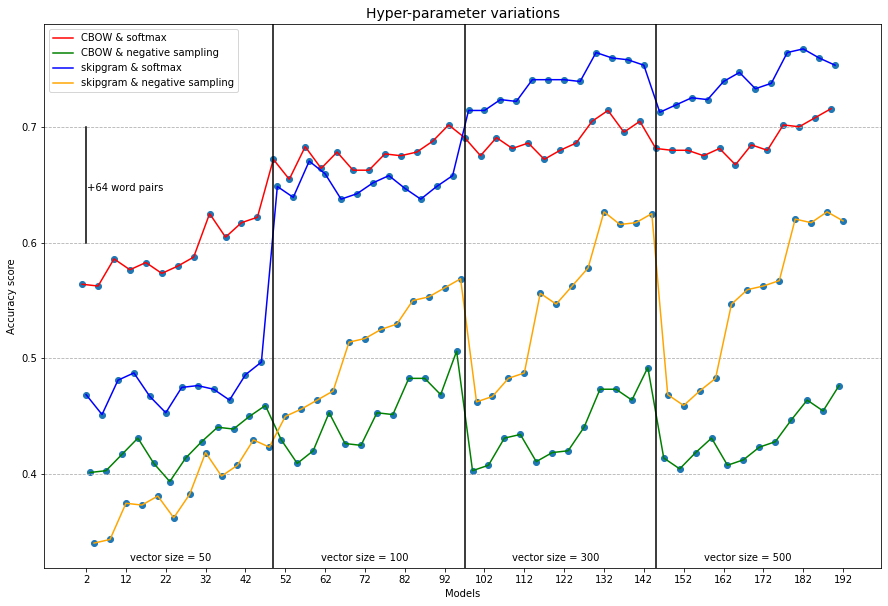

In [187]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('Hyper-parameter variations', fontsize=14)

ax.scatter(data=data, x="id", y="evalNew", label=None)

ax.plot(data.id[(data.trainAlgorithm=="CBOW") & (data.methodSampl=="softmax")], data.evalNew[(data.trainAlgorithm=="CBOW") & (data.methodSampl=="softmax")], color="r", linestyle="-", label="CBOW & softmax")

ax.plot(data.id[(data.trainAlgorithm=="CBOW") & (data.methodSampl=="negSampl")], data.evalNew[(data.trainAlgorithm=="CBOW") & (data.methodSampl=="negSampl")], color="green", linestyle="-", label="CBOW & negative sampling")

ax.plot(data.id[(data.trainAlgorithm=="skipgram") & (data.methodSampl=="softmax")], data.evalNew[(data.trainAlgorithm=="skipgram") & (data.methodSampl=="softmax")], color="blue", linestyle="-", label="skipgram & softmax")

ax.plot(data.id[(data.trainAlgorithm=="skipgram") & (data.methodSampl=="negSampl")], data.evalNew[(data.trainAlgorithm=="skipgram") & (data.methodSampl=="negSampl")], color="orange", linestyle="-", label="skipgram & negative sampling")

ax.grid(True, axis="y", linestyle="--")
ax.legend(loc="upper left")
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy score")
ax.xaxis.set_ticks(np.arange(1, 192, 10))

ax.text(12, 0.325, "vector size = 50")
ax.axvline(48, color="k", linestyle="-")
ax.text(60, 0.325, "vector size = 100")
ax.axvline(96, color="k", linestyle="-")
ax.text(108, 0.325, "vector size = 300")
ax.axvline(144, color="k", linestyle="-")
ax.text(156, 0.325, "vector size = 500")

ax.plot([1,1], [0.6, 0.7], color="k")
ax.text(1.3, 0.645, "+64 word pairs")


"""
X = np.array(range(len(data)))
X = X.astype(np.float64)
scores = np.array(data.evalNew)
z = np.polyfit(X, scores, 1)
p = np.poly1d(z)
ax.plot(X,p(X),"r--", linewidth=2.0)
"""

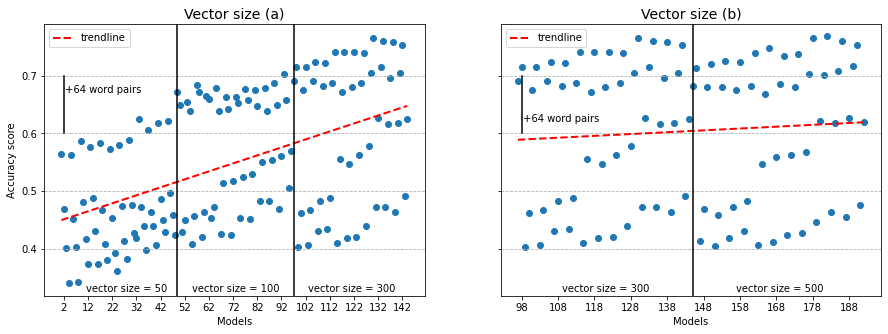

In [190]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True)

ax[0].set_title('Vector size (a)', fontsize=14)

ax[0].scatter(data=data[data.vectorSize!="500"], x="id", y="evalNew", label=None)

X = np.array(range(len(data[data.vectorSize!="500"])))
X = X.astype(np.float64)
scores = np.array(data.evalNew[data.vectorSize!="500"])
z = np.polyfit(X, scores, 1)
p = np.poly1d(z)
ax[0].plot(X,p(X),"r--", linewidth=2.0, label="trendline")

ax[0].grid(True, axis="y", linestyle="--")
ax[0].set_xlabel("Models")
ax[0].set_ylabel("Accuracy score")
ax[0].xaxis.set_ticks(np.arange(1, 144, 10))

ax[0].text(10, 0.325, "vector size = 50")
ax[0].axvline(48, color="k", linestyle="-")
ax[0].text(54, 0.325, "vector size = 100")
ax[0].axvline(96, color="k", linestyle="-")
ax[0].text(102, 0.325, "vector size = 300")

ax[0].plot([1,1], [0.6, 0.7], color="k")
ax[0].text(1.3, 0.67, "+64 word pairs")

ax[0].legend(loc="upper left")

####

ax[1].set_title('Vector size (b)', fontsize=14)

ax[1].scatter(data=data[(data.vectorSize=="300") | (data.vectorSize=="500")], x="id", y="evalNew", label=None)

X = np.array(range(len(data[(data.vectorSize=="300") | (data.vectorSize=="500")])))
X = X.astype(np.float64)
scores = np.array(data.evalNew[(data.vectorSize=="300") | (data.vectorSize=="500")])
z = np.polyfit(X, scores, 1)
p = np.poly1d(z)
ax[1].plot(X,p(X),"r--", linewidth=2.0, label="trendline")

ax[1].grid(True, axis="y", linestyle="--")
ax[1].set_xlabel("Models")
ax[1].xaxis.set_ticks(np.arange(1, 96, 10))

ax[1].text(12, 0.325, "vector size = 300")
ax[1].axvline(48, color="k", linestyle="-")
ax[1].text(60, 0.325, "vector size = 500")

ax[1].plot([1,1], [0.6, 0.7], color="k")
ax[1].text(1.3, 0.62, "+64 word pairs")

ax[1].legend(loc="upper left")

In [191]:
data=data[(data.vectorSize=="300")|(data.vectorSize=="500")]
data=data[data.trainAlgorithm=="skipgram"]

Text(37, 0.64, 'skipgram & neg. sampling')

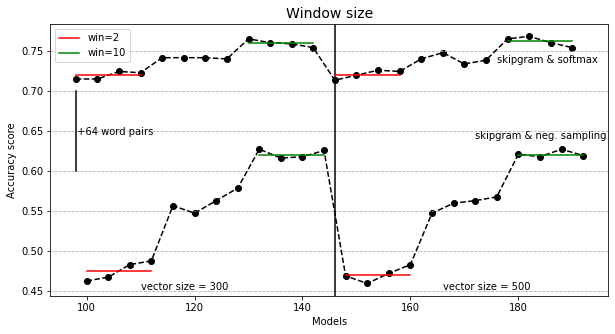

In [201]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title('Window size', fontsize=14)

ax.scatter(data=data, x="id", y="evalNew", label=None, color="black")

ax.plot(data.id[(data.trainAlgorithm=="skipgram") & (data.methodSampl=="softmax")], data.evalNew[(data.trainAlgorithm=="skipgram") & (data.methodSampl=="softmax")], linestyle="--", color="black")

ax.plot(data.id[(data.trainAlgorithm=="skipgram") & (data.methodSampl=="negSampl")], data.evalNew[(data.trainAlgorithm=="skipgram") & (data.methodSampl=="negSampl")], linestyle="--", color="black")

ax.grid(True, axis="y", linestyle="--")
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy score")
ax.xaxis.set_ticks(np.arange(1, 192, 10))

ax.text(6, 0.451, "vector size = 300")
ax.axvline(24, color="k", linestyle="-")
ax.text(34, 0.451, "vector size = 500")

ax.plot([0,0], [0.6, 0.7], color="k")
ax.text(0.1, 0.645, "+64 word pairs")

ax.plot([0,6], [0.72, 0.72], color="r", linestyle="-", label="win=2")
ax.plot([1,7], [0.475, 0.475], color="r", linestyle="-")
ax.plot([24,30], [0.72, 0.72], color="r", linestyle="-")
ax.plot([25,31], [0.47, 0.47], color="r", linestyle="-")

ax.plot([16,22], [0.76, 0.76], color="green", linestyle="-", label="win=10")
ax.plot([17,23], [0.62, 0.62], color="green", linestyle="-")
ax.plot([40,46], [0.762, 0.762], color="green", linestyle="-")
ax.plot([41,47], [0.62, 0.62], color="green", linestyle="-")

ax.legend(loc="upper left")

ax.text(39, 0.735, "skipgram & softmax")
ax.text(37, 0.64, "skipgram & neg. sampling")

In [233]:
# Compare old/new results

p = figure(title="Training Part 2: Evaluation results", plot_width=1000, plot_height=550, x_range=(0,192))
p.xaxis.axis_label = "Model id"
p.yaxis.axis_label = "Eval score"


p.line("id", "evalNew", source=data[(data.minCount == "0")], color="blue")
p.scatter("id", "evalNew", source=data[(data.methodSampl == "softmax") & (data.minCount == "0")], color="red")
p.scatter("id", "evalNew", source=data[(data.methodSampl == "negSampl") & (data.minCount == "0")], color="green")
vline50 = Span(location=48, dimension='height', line_color='red', line_width=0.5)
vline100 = Span(location=96, dimension='height', line_color='red', line_width=0.5)
vline300 = Span(location=144, dimension='height', line_color='red', line_width=0.5)
p.renderers.extend([vline50, vline100, vline300])

show(p)

In [228]:
# Compare old/new results

p = figure(title="Training Part 2: Evaluation results", plot_width=1000, plot_height=550, x_range=(0,192))
p.xaxis.axis_label = "Model id"
p.yaxis.axis_label = "Eval score"


p.line("id", "evalNew", source=data[(data.minCount == "5")], color="blue")
p.scatter("id", "evalNew", source=data[(data.methodSampl == "softmax") & (data.minCount == "5")], color="red")
p.scatter("id", "evalNew", source=data[(data.methodSampl == "negSampl") & (data.minCount == "5")], color="green")
vline50 = Span(location=48, dimension='height', line_color='red', line_width=0.5)
vline100 = Span(location=96, dimension='height', line_color='red', line_width=0.5)
vline300 = Span(location=144, dimension='height', line_color='red', line_width=0.5)
p.renderers.extend([vline50, vline100, vline300])

show(p)

In [234]:
# Compare old/new results

p = figure(title="Training Part 2: Evaluation results", plot_width=1000, plot_height=550, x_range=(0,192))
p.xaxis.axis_label = "Model id"
p.yaxis.axis_label = "Eval score"


p.line("id", "evalNew", source=data[(data.minCount == "20")], color="blue")
p.scatter("id", "evalNew", source=data[(data.methodSampl == "softmax") & (data.minCount == "20")], color="red")
p.scatter("id", "evalNew", source=data[(data.methodSampl == "negSampl") & (data.minCount == "20")], color="green")
vline50 = Span(location=48, dimension='height', line_color='red', line_width=0.5)
vline100 = Span(location=96, dimension='height', line_color='red', line_width=0.5)
vline300 = Span(location=144, dimension='height', line_color='red', line_width=0.5)
p.renderers.extend([vline50, vline100, vline300])

show(p)

In [235]:
# Compare old/new results

p = figure(title="Training Part 2: Evaluation results", plot_width=1000, plot_height=550, x_range=(0,192))
p.xaxis.axis_label = "Model id"
p.yaxis.axis_label = "Eval score"


p.line("id", "evalNew", source=data[(data.minCount == "50")], color="blue")
p.scatter("id", "evalNew", source=data[(data.methodSampl == "softmax") & (data.minCount == "50")], color="red")
p.scatter("id", "evalNew", source=data[(data.methodSampl == "negSampl") & (data.minCount == "50")], color="green")
vline50 = Span(location=48, dimension='height', line_color='red', line_width=0.5)
vline100 = Span(location=96, dimension='height', line_color='red', line_width=0.5)
vline300 = Span(location=144, dimension='height', line_color='red', line_width=0.5)
p.renderers.extend([vline50, vline100, vline300])

show(p)

In [243]:
# Compare old/new results
id = [x for x in range(1, 49)]
values100 = data.evalNew[data.vectorSize == "100"]
values300 = data.evalNew[data.vectorSize == "300"]
values500 = data.evalNew[data.vectorSize == "500"]

p = figure(title="Training Part 2: Evaluation results", plot_width=1000, plot_height=550, x_range=(0, 49))
p.xaxis.axis_label = "Model id"
p.yaxis.axis_label = "Eval score"

p.line(id, values100, color="green")
p.line(id, values300, color="red")
p.line(id, values500, color="blue")

show(p)

In [27]:
# Check: does number of "validation pairs" correlate with scores
"""
p = figure(title="Training Part 2: Evaluation results")
p.xaxis.axis_label = "Count pairs"
p.yaxis.axis_label = "Eval score"

p.scatter("countPairs", "evalScore", source=dataPart, fill_alpha=0.4, size=10)

show(p)
"""

'\np = figure(title="Training Part 2: Evaluation results")\np.xaxis.axis_label = "Count pairs"\np.yaxis.axis_label = "Eval score"\n\np.scatter("countPairs", "evalScore", source=dataPart, fill_alpha=0.4, size=10)\n\nshow(p)\n'

In [46]:
# Check performance: softmax vs. negative sampling

methods = ["softmax", "negSampl"]
markers = ["hex", "triangle"]

p = figure(title="Training Part 2: Evaluation results")
p.xaxis.axis_label = "Constant Groups"
p.yaxis.axis_label = "Eval score"

p.scatter("groupMethod", "evalNew", source=dataPart, legend_field="methodSampl", fill_alpha=0.4, size=10,
            marker=factor_mark("methodSampl", markers, methods),
            color=factor_cmap("methodSampl", "Category10_3", methods))

p.add_layout(p.legend[0], "right")

show(p)

In [48]:
# Check performance: CBOW vs. skipgram

methods = ["CBOW", "skipgram"]
markers = ["hex", "triangle"]

p = figure(title="Training Part 2: Evaluation results")
p.xaxis.axis_label = "Constant Groups"
p.yaxis.axis_label = "Eval score"

p.scatter("groupAlgo", "evalNew", source=dataPart, legend_field="trainAlgorithm", fill_alpha=0.4, size=10,
            marker=factor_mark("trainAlgorithm", markers, methods),
            color=factor_cmap("trainAlgorithm", "Category10_3", methods))

p.add_layout(p.legend[0], "right")

show(p)

In [50]:
# Check performance: vector size

methods = ["CBOW", "skipgram"]
markers = ["hex", "triangle"]

p = figure(title="Training Part 2: Evaluation results")
p.xaxis.axis_label = "Models"
p.yaxis.axis_label = "Eval score"

p.scatter("vectorSize", "evalNew", source=dataPart, legend_field="trainAlgorithm", fill_alpha=0.4, size=10,
            marker=factor_mark("trainAlgorithm", markers, methods),
            color=factor_cmap("trainAlgorithm", "Category10_3", methods))

p.add_layout(p.legend[0], "right")

show(p)

In [52]:
# Check performance: vector size - part 2

methods = ["500", "300", "100", "50"]
markers = ["hex", "triangle", "square", "cross"]

p = figure(title="Training Part 2: Evaluation results")
p.xaxis.axis_label = "Constant Groups"
p.yaxis.axis_label = "Eval score"

p.scatter("groupVector", "evalNew", source=dataPart, legend_field="vectorSize", fill_alpha=0.4, size=10,
            marker=factor_mark("vectorSize", markers, methods),
            color=factor_cmap("vectorSize", "Category10_3", methods))

p.add_layout(p.legend[0], "right")

show(p)

In [54]:
# Check performance: window size

methods = ["CBOW", "skipgram"]
markers = ["hex", "triangle"]

p = figure(title="Training Part 2: Evaluation results")
p.xaxis.axis_label = "Models"
p.yaxis.axis_label = "Eval score"

p.scatter("window", "evalNew", source=dataPart, legend_field="trainAlgorithm", fill_alpha=0.4, size=10,
            marker=factor_mark("trainAlgorithm", markers, methods),
            color=factor_cmap("trainAlgorithm", "Category10_3", methods))

p.add_layout(p.legend[0], "right")

show(p)

In [56]:
# Check performance: window size - part 2

methods = ["2", "5", "10"]
markers = ["hex", "triangle", "square"]

p = figure(title="Training Part 2: Evaluation results")
p.xaxis.axis_label = "Constant Groups"
p.yaxis.axis_label = "Eval score"

p.scatter("groupWin", "evalNew", source=dataPart, legend_field="window", fill_alpha=0.4, size=10,
            marker=factor_mark("window", markers, methods),
            color=factor_cmap("window", "Category10_3", methods))

p.add_layout(p.legend[0], "right")

show(p)

In [58]:
# Check performance: min count

methods = ["CBOW", "skipgram"]
markers = ["hex", "triangle"]

p = figure(title="Training Part 2: Evaluation results")
p.xaxis.axis_label = "Models"
p.yaxis.axis_label = "Eval score"

p.scatter("minCount", "evalNew", source=dataPart, legend_field="trainAlgorithm", fill_alpha=0.4, size=10,
            marker=factor_mark("trainAlgorithm", markers, methods),
            color=factor_cmap("trainAlgorithm", "Category10_3", methods))

p.add_layout(p.legend[0], "right")

show(p)

In [60]:
# Check performance: min count - part 2

methods = ["0", "5", "20", "50"]
markers = ["hex", "triangle", "square"]

p = figure(title="Training Part 2: Evaluation results")
p.xaxis.axis_label = "Constant Groups"
p.yaxis.axis_label = "Eval score"

p.scatter("groupCount", "evalNew", source=dataPart, legend_field="minCount", fill_alpha=0.4, size=10,
            marker=factor_mark("minCount", markers, methods),
            color=factor_cmap("minCount", "Category10_3", methods))

p.add_layout(p.legend[0], "right")

show(p)

### Appendix: Check Bokeh settings!!!

In [19]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row, gridplot
from bokeh.plotting import figure, show, output_file
output_notebook()

import numpy as np

x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p1 = figure(title="Legend Example", tools=TOOLS)
p1.circle(x,   y, legend_label="sin(x)")
p1.circle(x, 2*y, legend_label="2*sin(x)", color="orange")
p1.circle(x, 3*y, legend_label="3*sin(x)", color="green")
show(p1)


Loading BokehJS ...